# Logistic Regression

🎯 Up until now, you have been modeling a regression task. This time, you are going to be modeling a classification task, on the famous Titanic dataset.

👇 Load the `titanic.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [ ]:
import pandas as pd

df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


```markdown
Variable    Definition      Key

survival    Survival        0 = No, 1 = Yes
pclass      Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
```

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model be at such a task? Cross-validate the model and save the mean accuracy under variable name `accuracy`.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Create the feature set
X = df[['Pclass','SibSp','Parch','Fare']]
y = df['Survived']

# Instanciate model
model = LogisticRegression(max_iter=1000)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()

accuracy

0.6835791852363318

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('accuracy',
                         accuracy = accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/pavelliser/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/pavelliser/Desktop/DataSciProgram/data-solutions/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_accuracy.py::TestAccuracy::test_accuracy PASSED               [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/accuracy.pickle

git commit -m 'Completed accuracy step'

git push origin master


# 2. In-depth diagnosis

❓ We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? Underfitting? How many learning examples does it need to learn optimally on the given features?

<br/>

<details>
<summary> ℹ️ What do we want? </summary>   
    
<br/>
We want learning curves.
    
</details>


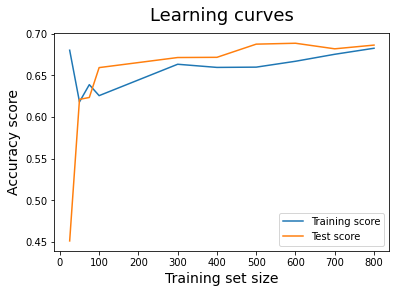

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [25,50,75,100,300,400,500,600,700,800], 
                                                              cv = 20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()


<details>
<summary> ℹ️ Once you have completed your diagnosis, unfold this cell for our interpretation </summary>   
    
<br/>
You should have plotted the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html">learning curves</a>.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    
</details>


# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [ ]:
# Create the reduced feature set and target
df_reduced = df.sample(n=500, random_state=1)
X_reduced = df_reduced[['Pclass','SibSp','Parch','Fare']]
y_reduced = df_reduced['Survived']

# 5-Fold Cross validate model
cv_results = cross_validate(LogisticRegression(max_iter=1000), X_reduced, y_reduced, cv=5)

# Mean of accuracies
reduced_training_accuracy = cv_results['test_score'].mean()

reduced_training_accuracy

0.682

ℹ️ The accuracy should be nearly the same, with a reduced computational expense.

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_accuracy',
                         accuracy = reduced_training_accuracy
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/pavelliser/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/pavelliser/Desktop/DataSciProgram/data-solutions/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 1 item

tests/test_reduced_accuracy.py::TestReduced_accuracy::test_accuracy PASSED [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/reduced_accuracy.pickle

git commit -m 'Completed reduced_accuracy step'

git push origin master


# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or siblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

Create and fit a new model (remember, `cross_validate` doesn't return a fitted model).

⚠️ Make sure the model you use for predicting has the **least computational expense possible**. Save the prediction under variable name `prediction`.

In [ ]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Instanciate the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(np.array(X_reduced), y_reduced)

# Use the trained model to predict
prediction = log_model.predict([[1,0,0,15]])[0]

prediction

1

❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.

<br/>

<details>
    <summary markdown='span'>💡 Hint</summary>

To return the predicted probabilities from a fitted sklearn Classifier, have a look at the method `.predict_proba()`
</details>

In [ ]:
# Access probability of class 1 in model attributes
probability = log_model.predict_proba([[1,0,0,15]])[0][1]

probability

0.6216473629531936

### ☑️ Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('predictions',
                         prediction = prediction,
                         probability = probability
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/pavelliser/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/pavelliser/Desktop/DataSciProgram/data-solutions/05-ML/01-Fundamentals-of-Machine-Learning/04-Logistic-Regression
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 3 items

tests/test_predictions.py::TestPredictions::test_prediction_is_1 PASSED  [ 33%]
tests/test_predictions.py::TestPredictions::test_probability PASSED      [ 66%]
tests/test_predictions.py::TestPredictions::test_probability_type PASSED [100%]

============================== 3 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/predictions.pickle

git commit -m 'Completed predictions step'

git push origin master


# 5 Optional - Model Calibration
*Can you trust the predicted probabilities?* 🤔

- ❗️ Accuracy only evaluate your model performance based on the predicted **classes** 0s and 1s (obtained via`.predict()`)
- ❗️ High accuracy does not necessarily mean that predicted **probabilities** are "calibrated" (obtained via `.predict_probas()`)

What does "calibrated" probabilities mean? 
> _Among the samples to which your model gave a predict_proba value close to 0.9, approximately 90% actually belong to the positive class._

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/logistic-regression.png'>

❓ **Question 1**: Read more about [Calibration](https://scikit-learn.org/stable/modules/calibration.html) on sklearn docs

❓ **Question 2**: Try to implement [`CalibrationDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibrationDisplay.html) to check if you model is calibrated (on a holdout test set)

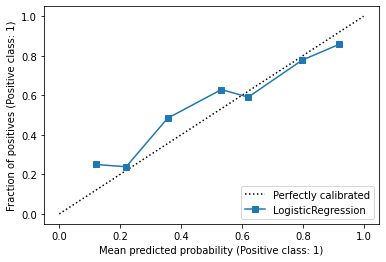

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=1)

# Fit a model on the train set
# $DELETE_BEGIN
model = LogisticRegression().fit(X_train, y_train)
# $DELETE_END

# Print calibration curve on the test set
# $DELETE_BEGIN
disp = CalibrationDisplay.from_estimator(model, X_test, y_test, n_bins=7)
# $DELETE_END

<details>
    <summary markdown='span'>ℹ️ Interpreting the calibration curves</summary>

If for the previous prediction you got a probability of around 0.65 then, if the model was well-calibrated, 65% of the cases that model assigns a probability of 0.65 would _actually_ have the class 1 ("Survived" in our case).
    
But from our calibration curves we can notice, that when the model predicts 0.65, there's actually _less_ (below the curve) real fraction of cases with class 1.
</details>

❓ **Question 3**: Try to calibrate your model using sklearn's [`CalibratedClassifierCV`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html), and compute your new probability of survival. 

> Note that logistic regression models are already generally well calibrated because they try to minimize the log-loss. Refer to lecture https://kitt.lewagon.com/camps/👉YOUR_CAMP_NUMBER👈/lectures/content/04-Decision-Science_04-Logistic-Regression.slides.html?title=Logistic-Regression#/2/7/0

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(base_estimator=model)
calibrated_model.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression())

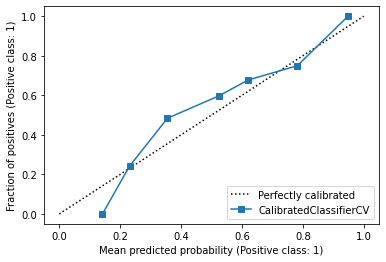

In [ ]:
disp = CalibrationDisplay.from_estimator(calibrated_model, X_test, y_test, n_bins=7)

In [ ]:
calibrated_model.predict_proba([[1,0,0,15]])[0][1]

0.5102719032318139

<details>
    <summary markdown='span'>ℹ️ Interpreting the new probability</summary>

Our previous model tended to slightly _overestimate_ probabilities around the middle range (for example, there were actually less than 65% of class 1 cases when model was predicting probability of 0.65).
    
Calibration seems to have made our model slightly _underestimate_ those probabilities 🙃; for example, when the model predicts a probability of 0.5 the real fraction of cases with class 1 is more than that.
</details>

# 🏁